# Ensemble Methods

### The data
Download the data from moodle: kaggle_fifa21_players.csv  
You find a description of this dataset here:  
https://www.kaggle.com/stefanoleone992/fifa-21-complete-player-dataset

**Goal:** The dataset contains a large number of attributes for each football player in the FIFA 21 game. Try to explore the dataset and use an ensemble method to predict the attributes 'overall'.

### Hints
- Download the dataset and load the CSV file using pandas and the read_csv function  
- To begin with, focus on a few features (by creating a copy of the dataframe with only a few columns) and only a subset of the data (e.g. 1000 random rows).    
- Explore the data (for example by visualizing it). It is important to know if you have invalid values in your dataset. Remove them (this step is called cleansing).  
- Scale the data. 
  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html  
  https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html
- Use sklearn.linear_model import LinearRegression. You can first train a single model to get an idea of the performance you can expect. 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html   
- Be careful: some data is categorical (e.g. work_rate). Either exclude it from the data or find a way to turn it into a numerical value.
- Use the BaggingRegressor to combine multiple linear models:  
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html  
- Evaluate the performance on an unused test-set.  

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# load the data and inspect it
df = pd.read_csv('kaggle_fifa21_players.csv')
df

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3
4,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,28,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,67+3,62+3,62+3,62+3,67+3,62+3,49+3,49+3,49+3,62+3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18939,256679,https://sofifa.com/player/256679/kevin-angulo/...,K. Angulo,Kevin Angulo,24,1996-04-13,176,73,Colombia,América de Cali,...,47+2,47+2,47+2,47+2,47+2,47+2,46+2,46+2,46+2,47+2
18940,257710,https://sofifa.com/player/257710/mengxuan-zhan...,Zhang Mengxuan,Mengxuan Zhang,21,1999-04-26,177,70,China PR,Chongqing Dangdai Lifan FC SWM Team,...,42+2,41+2,41+2,41+2,42+2,45+2,47+2,47+2,47+2,45+2
18941,250989,https://sofifa.com/player/250989/zhenghao-wang...,Wang Zhenghao,王政豪,20,2000-06-28,185,74,China PR,Tianjin TEDA FC,...,42+2,42+2,42+2,42+2,42+2,44+2,47+2,47+2,47+2,44+2
18942,257697,https://sofifa.com/player/257697/zitong-chen/2...,Chen Zitong,Zitong Chen,23,1997-02-20,186,80,China PR,Shijiazhuang Ever Bright F.C.,...,47+2,49+2,49+2,49+2,47+2,47+2,49+2,49+2,49+2,47+2


### Selection of data
We make the task simpler by randomly selecting 2000 rows and only a few columns.  

You may have noticed that some of the features (e.g. 'value_eur', 'wage_eur') strongly correlate with the 'overall' value. The task is a bit more interesting if we do not use those features but if we base the prediction on features that express some skills of the player.

In [4]:
data = df[['overall', 'skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
data = data.sample(n=2000)
display(data)

,overall,skill_moves,pace,shooting,passing,dribbling,defending,physic
15334,60,1,NaN,NaN,NaN,NaN,NaN,NaN
1818,75,4,76.0,73.0,76.0,79.0,40.0,55.0
2106,74,2,65.0,23.0,43.0,40.0,77.0,74.0
5883,69,3,54.0,56.0,60.0,63.0,67.0,83.0
2625,73,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
13047,62,3,64.0,52.0,58.0,69.0,33.0,43.0
17521,55,2,56.0,33.0,50.0,50.0,53.0,56.0
17587,55,2,60.0,55.0,41.0,54.0,22.0,46.0
11254,64,3,68.0,62.0,52.0,62.0,28.0,70.0


In [5]:
# split X and y. Split test and train

data_X = data[['skill_moves', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic']]
data_y = data.overall  # yes, we can access columns by name

# put some data aside for testing. This data is NOT touched at all during learning
# We have a lot of data to train a simple linear model. We can hava a relatively large test set.
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.50)

In [6]:
# do some cleaning: do all rows have a value in 'overall' or are there nulls?
display(y_train.isnull().sum())
display(X_train.isnull().sum())  # isnull returns true/false. we can sum them.

0

skill_moves      0
pace           126
shooting       126
passing        126
dribbling      126
defending      126
physic         126
dtype: int64

In [7]:
# there are nulls in the league_rank column
# Depending on the project, there are different options how to deal with null values.
# In a real project, you would have to carefully evaluate those null values!
# Here we apply a very simple strategy: fill them with the column average.
X_train.fillna(X_train.mean(), inplace=True)

In [8]:
# we get a SettingWithCopyWarning, but in our case it works fine:
display(X_train.isnull().sum())

skill_moves    0
pace           0
shooting       0
passing        0
dribbling      0
defending      0
physic         0
dtype: int64

### Single Linear Model
Training a single linear model that uses all features and all data provides a baseline to compare the performance of the simpler models.

In [9]:
# Before training, scale the data
# scaling is common practice as it makes the different features comparable and 
# avoids problems with certain optimization techniques. 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train)
print('scaler.mean_={}'.format(scaler.mean_))
print('scaler.scale_={}'.format(scaler.scale_))

X_train_scaled = scaler.transform(X_train)

scaler.mean_=[ 2.34       67.82494279 52.78032037 56.89473684 62.51372998 49.99313501
 64.07437071]
scaler.scale_=[ 0.76837491 10.45563084 13.04583541  9.44787361  9.01090091 15.68119762
  9.03704409]


In [10]:
# now do linear regression on the data:
# in a first step, use a model, that has access to all data, all features.
# later we use an ensemble of simpler linear models and see how close the
# ensemble reaches the performance of this model.
from sklearn.linear_model import LinearRegression

lin_reg_model = LinearRegression().fit(X_train_scaled, y_train)

# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score
# score is also known as 'coefficient of determination'
# https://en.wikipedia.org/wiki/Coefficient_of_determination
print('Coefficient of determination of the linear model:')
print(lin_reg_model.score(X_train_scaled, y_train))

Coefficient of determination of the linear model:
0.6381579657007943


In [11]:
# The coefficients tell us how much each feature predicts the 'overall' value. 
# As we have normalized the features, the scores can be compared across features.
# But: A simple model like this should not be used to draw conclusions about
# single features. The reason is, that the features themselves are correlated .
lin_reg_model.coef_

array([ 0.93765826, -0.09937787,  1.13283872,  0.7271796 ,  2.56731142,
        1.86718238,  2.23372084])

### Preprocessing the test data
It is a common mistake to apply preprocessing steps (replacing null-values by mean and/or scaling) to the entire dataset. The problem is that by doing this, you leak information from the test-data to the training data (mean and std are no longer neutral, as they include test-data). As a result your test-data provides no longer an unbiased estimator of the generalization error.

Consequently, we have to repeat *some* pre-processing steps here:  
- It is important to REUSE the same scaler that was used for the training data.  
- The treatment of null values is done independently on the test-data.

In [12]:
X_test.fillna(X_test.mean(), inplace=True)
X_test_scaled = scaler.transform(X_test)

## Ensemble of linear models
When composing an ensemble, we have different choices:  
- The models can have different algorithms
- The models can use different features
- The models can be trained on different data

In this example, all models use the same algorithm (Linear Regression), but they differ in data and features.  Note that in this example, each linear model in the ensemble sees only **5 percent of the training data**.

Change the parameter values and observe how the performance scores are affected by your choices.  


In [14]:
from sklearn.ensemble import BaggingRegressor

baggingRegressor = BaggingRegressor(base_estimator=LinearRegression(),
                                    n_estimators=50, 
                                    max_samples=0.2,  # each model is trained on 5% of the data (with replacement)
                                    max_features=4,# each model is sees only 6 (random) of 7 ftrs
                                    bootstrap = True,
                                    random_state=0, 
                                    oob_score = True)
baggingRegressor = baggingRegressor.fit(X_train_scaled, y_train)

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


### Performance of the ensemble and of individual models in the ensemble

In [16]:
# evaluate the model. The ensemble reaches practically the same performance as the
# more complex model which was trained on all training data.
print('coefficient of determination (aka score, aka R2) on test data:')
baggingRegressor.score(X_test_scaled, y_test)

coefficient of determination (aka score, aka R2) on test data:


0.6479853819644307

In [17]:
# oob_score is an estimate of the score based on data in 
# the TRAINING data set, but that was NOT used (by chance) during training!
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingRegressor.html
baggingRegressor.oob_score_

0.6171831973841941

In [18]:
# to get more insights, we access and evaluate every single model in the ensemble

# example: we access the model#2:
idx_estimator = 2

#get the estimator
simple_linear_model = baggingRegressor.estimators_[idx_estimator]

# each model is trained on random features:
idx_ftrs = baggingRegressor.estimators_features_[idx_estimator]
print('idx of features used to train model #{}:'.format(idx_estimator))
print(idx_ftrs)

simple_linear_model.score(X_test_scaled[:,idx_ftrs], y_test)


idx of features used to train model #2:
[0 1 6 2]


0.4862286417144196

In [20]:
# we can evaluate the performance of every single simple model in the ensemble:
nr_models = len(baggingRegressor.estimators_)
all_scores = np.zeros(nr_models)
sum_scores = 0.0

for i in range(nr_models):
    lin_mod = baggingRegressor.estimators_[i]
    idx_ftrs = baggingRegressor.estimators_features_[i]
    score_i = lin_mod.score(X_test_scaled[:,idx_ftrs], y_test)
    all_scores[i] = score_i
    sum_scores += score_i

average_score = sum_scores/nr_models

Text(0.5, 1.0, 'Histogram of scores')

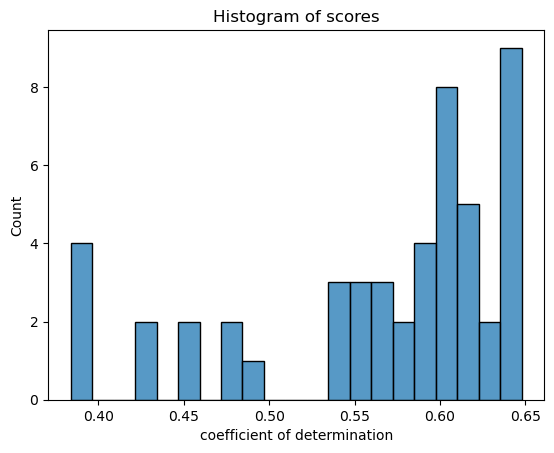

In [21]:
# visualize the scores of the different models
p = sns.histplot(all_scores, bins=21)
p.set_xlabel('coefficient of determination')
p.set_title('Histogram of scores')

In [46]:
print(np.max(all_scores))

0.6267983315948943


In [22]:
print(average_score)

0.5651775796556546


## Performance of the best model in the ensemble
The result we obtain depends on the features, the data, and the random samples. For those reasons, you probably observe different scores.  
Here we observe np.max(all_scores)=0.6679 which is only slightly worse than the ensemble score 0.6702.  
If you run this notebook several times, it is possible that a single model in the ensemble performs *better* than the ensemble. The reason is, that if we train hundreds or models, there is a chance that every now and then, the random samples drawn from the training set are more similar to the test set and that the model trained with those data is, *just by chance*, better than expected.  

**But remember: the performance of a single model in the ensemble is irrelevant. In general, the ensemble performs better than the single models and generalizes better to unseen data**.

In [23]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(base_estimator = LinearRegression(), random_state=0, n_estimators=100)
regr.fit(X_train_scaled, y_train)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.score(X_test_scaled, y_test)

c:\Users\mrcls\.conda\envs\AIFO23\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.6628881176130519

In [24]:
from sklearn.ensemble import AdaBoostRegressor
regr = AdaBoostRegressor(random_state=0, n_estimators=100)
regr.fit(X_train_scaled, y_train)
AdaBoostRegressor(n_estimators=100, random_state=0)
regr.score(X_test_scaled, y_test)

0.6904733038765578

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
Gregr = GradientBoostingRegressor(random_state=0, n_estimators=100)
Gregr.fit(X_train_scaled, y_train)
Gregr.score(X_test_scaled, y_test)

0.8224909010367611